# 3. Deep Neural Network training

In [2]:
# K3d and livelossplot material libraries have to be installed 

In [1]:
!pip install k3d

In [2]:
!pip install livelossplot

# 3.1 Modules & Packages importation

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import keras
import k3d
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from livelossplot.keras import PlotLossesCallback
from sklearn.metrics import confusion_matrix, f1_score
from ipywidgets import interact, widgets

import src

Using TensorFlow backend.


# 3.2 Model definition for Network to be used (CNN)

In [25]:
with h5py.File('data/processed/stanford6_truncated_rgb.h5', 'r') as dataset:
    x_train = np.array(dataset['train/X'])
    y_train = np.array(dataset['train/Y'])
    x_val = np.array(dataset['val/X'])
    y_val = np.array(dataset['val/Y'])

classnames = {
    0: 'Floodplain',
    1: 'Pointbar',
    2: 'Channel',
    3: 'Boundary',
}    
    
m = x_train.shape[0]
n_classes = 4

input_shape = x_train.shape[1:]

model = Sequential()

model.add(Conv2D(32, (7,7), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(200))
model.add(Activation('relu'))

model.add(Dense(n_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 8, 8, 32)          4736      
_________________________________________________________________
activation_35 (Activation)   (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 64)          51264     
_________________________________________________________________
activation_36 (Activation)   (None, 4, 4, 64)          0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 64)        

# 3.3 Hyperparameter settings for CNN

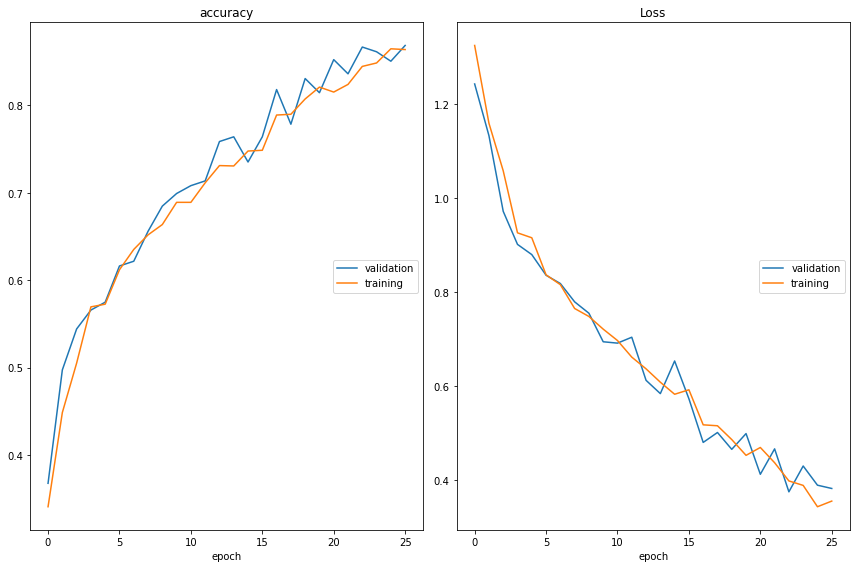

accuracy
	validation       	 (min:    0.368, max:    0.868, cur:    0.868)
	training         	 (min:    0.341, max:    0.865, cur:    0.864)
Loss
	validation       	 (min:    0.376, max:    1.244, cur:    0.383)
	training         	 (min:    0.344, max:    1.325, cur:    0.356)


In [26]:
batch_size = 32
epochs = 30

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs, 
    shuffle=True,
    callbacks=[PlotLossesCallback(), keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=3, min_delta=0.01, restore_best_weights=True)],
)

# 3.4 Training Model

In [28]:
model.save('models/stanford-32.h5')
print('Model saved!')

Model saved!
